<a href="https://colab.research.google.com/github/allen-99/diploma/blob/main/VKR_NLP_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download ru_core_news_sm
!pip install pymorphy2

2023-05-27 07:52:59.103259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 07:53:03.667807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=209000f83a11fa0631584bc7ab5f2ebdb0c6831e1b0ed1653f6821dd30b93d6c
  Stored in directory: /root/.

In [2]:
from datetime import datetime
import pytz

import pandas as pd

import spacy
from spacy.matcher import Matcher

import nltk
import pymorphy2

import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load("ru_core_news_sm")
matcher = Matcher(nlp.vocab)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [5]:
data = pd.read_csv('/content/sample_data/reviews_yandex_beacon.csv')
data.columns = ['text', 'rating', 'date']
data

,text,rating,date
0,"Очень живописное место, рекомендуем к посещени...",5,2022-08-11T11:04:26.966Z
1,Одно из самых любимых мест города! Есть где пе...,5,2023-01-18T11:12:34.442Z
2,"Место захоженное, а в остальном всё отлично) о...",5,2023-04-25T10:03:24.140Z
3,Встретили рассвет. Доехали на такси туда. Обра...,5,2023-03-18T08:33:41.066Z
4,В хорошую погоду замечательное прогулочные мес...,4,2023-05-09T11:12:20.230Z
...,...,...,...
615,"Отличное место, а главное вода чистая)))",5,2022-01-16T18:06:23.958Z
616,"Красиво, море чистое.",5,2021-09-10T03:03:48.737Z
617,Интересное место Владивостока. Рекомендую к об...,5,2020-03-15T14:07:48.456Z
618,"Хорошее место, хоть раз, но посетить стоит. На...",5,2023-04-05T12:37:39.383Z


Удаление дублирующихся отзывов

In [10]:
data = data.drop_duplicates(subset=['text'])
data

,text,rating,date
604,Понравилось дорога. Асфальтированная. Не понра...,5,2018-07-29
587,"Сходите в туалет перед походом на маяк, там он...",5,2018-10-04
603,"Понравился маяк, вид хороший на город и Золото...",5,2018-11-04
605,Хорошее место но немного уже засрато,4,2019-10-24
617,Интересное место Владивостока. Рекомендую к об...,5,2020-03-15
...,...,...,...
68,"Ехали на самокатах, не доехали, они попадают в...",5,2023-05-23
94,"Красивый, действующий маяк-была бы возможность...",5,2023-05-25
569,"Очень красивое место, приятно там находиться. ...",4,2023-05-25
60,Великолепно. Такое ощущение умиротворения и кр...,5,2023-05-25


Сортировка по дате

In [7]:
for index, row in data.iterrows():
  try:
    date = datetime.strptime(row['date'], '%Y-%m-%dT%H:%M:%S.%fZ')
  except:
    date = datetime.strptime(row['date'], '%Y-%m-%dT%H:%M:%S%fZ')
  row['date'] = date

In [8]:
data = data.sort_values('date')
data['date'] = pd.to_datetime(data['date']).dt.date

result = data.loc[data['rating'] == 0]
data = data.drop(result.index)

data

,text,rating,date
604,Понравилось дорога. Асфальтированная. Не понра...,5,2018-07-29
587,"Сходите в туалет перед походом на маяк, там он...",5,2018-10-04
603,"Понравился маяк, вид хороший на город и Золото...",5,2018-11-04
605,Хорошее место но немного уже засрато,4,2019-10-24
617,Интересное место Владивостока. Рекомендую к об...,5,2020-03-15
...,...,...,...
68,"Ехали на самокатах, не доехали, они попадают в...",5,2023-05-23
94,"Красивый, действующий маяк-была бы возможность...",5,2023-05-25
569,"Очень красивое место, приятно там находиться. ...",4,2023-05-25
60,Великолепно. Такое ощущение умиротворения и кр...,5,2023-05-25


###Описание данных

1.   Размер выборки: 1963 отзывов
2.   Тема: отзывы посетителей Приморского Океанариума
3.   Источник: отзывы в Яндекс. Карты
3.   Количество положительных (4,5) отзывов больше половины от всех отзывов
4.   Больше всего отзывов с рейтингом 5, меньше всего с рейтингом 2
5.   Отзывов с оценкой 5 подавляющее большинство




Text(0.5, 1.0, 'Отзывы')

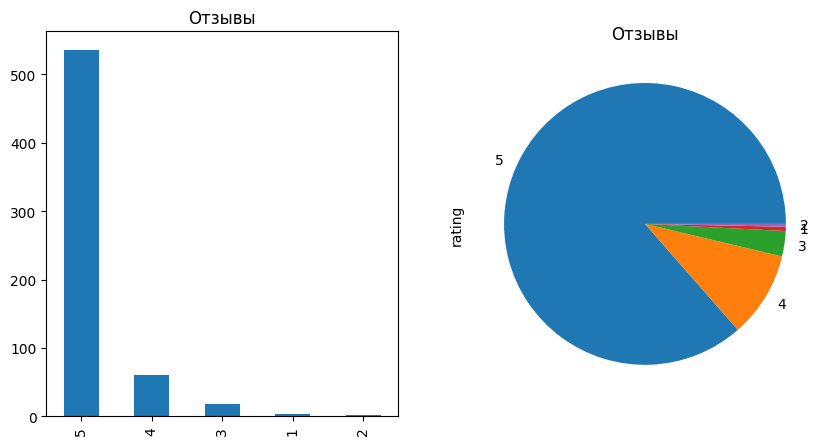

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Построение первой диаграммы на первом графическом объекте
data['rating'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Отзывы')

# Построение второй диаграммы на втором графическом объекте
data['rating'].value_counts().plot(kind='pie', ax=ax2)
ax2.set_title('Отзывы')

In [11]:
counts = data['rating'].value_counts()
counts = counts.sort_index()
count_pre = [(count/len(data['rating'])*100) for count in counts] 

print('Количество отзывов для каждого рейтинга: ')
for i in range(5):
  print(f'Рейтинг {i+1}: ', counts[i + 1], ' отзывов', '{:.2f}%'.format(count_pre[i]))

Количество отзывов для каждого рейтинга: 
Рейтинг 1:  3  отзывов 0.48%
Рейтинг 2:  2  отзывов 0.32%
Рейтинг 3:  18  отзывов 2.90%
Рейтинг 4:  61  отзывов 9.84%
Рейтинг 5:  536  отзывов 86.45%


In [ ]:
mean_rating = data['rating'].mean()
print('Средний рейтинг компании Приморский океанариум: ', mean_rating)

Средний рейтинг компании Приморский океанариум:  4.3460754332313964


Характеристики текста отзывов

In [ ]:
def count_words(text):
    return len(text.split())

mean_length = data['text'].apply(len).mean()
max_length = data['text'].apply(len).max()
min_length = data['text'].apply(len).min()
mean_word_count = data['text'].apply(count_words).mean()
max_word_count = data['text'].apply(count_words).max()
min_word_count = data['text'].apply(count_words).min()

print('Общие характеристики:')
print('Средняя длина отзыва (в символах): ', mean_length)
print('Максимальная длина отзыва (в символах): ', max_length)
print('Минимальная длина отзыва (в символах): ', min_length)
print('Среднее количество слов в отзыве: ', mean_word_count)
print('Минимальное количество слов в отзыве: ', max_word_count)
print('Максимальное количество слов в отзыве: ', min_word_count)

Общие характеристики:
Средняя длина отзыва (в символах):  263.36289500509685
Максимальная длина отзыва (в символах):  3934
Минимальная длина отзыва (в символах):  5
Среднее количество слов в отзыве:  38.19317023445464
Минимальное количество слов в отзыве:  607
Максимальное количество слов в отзыве:  1


Изменение рейтинга в течении всего времени

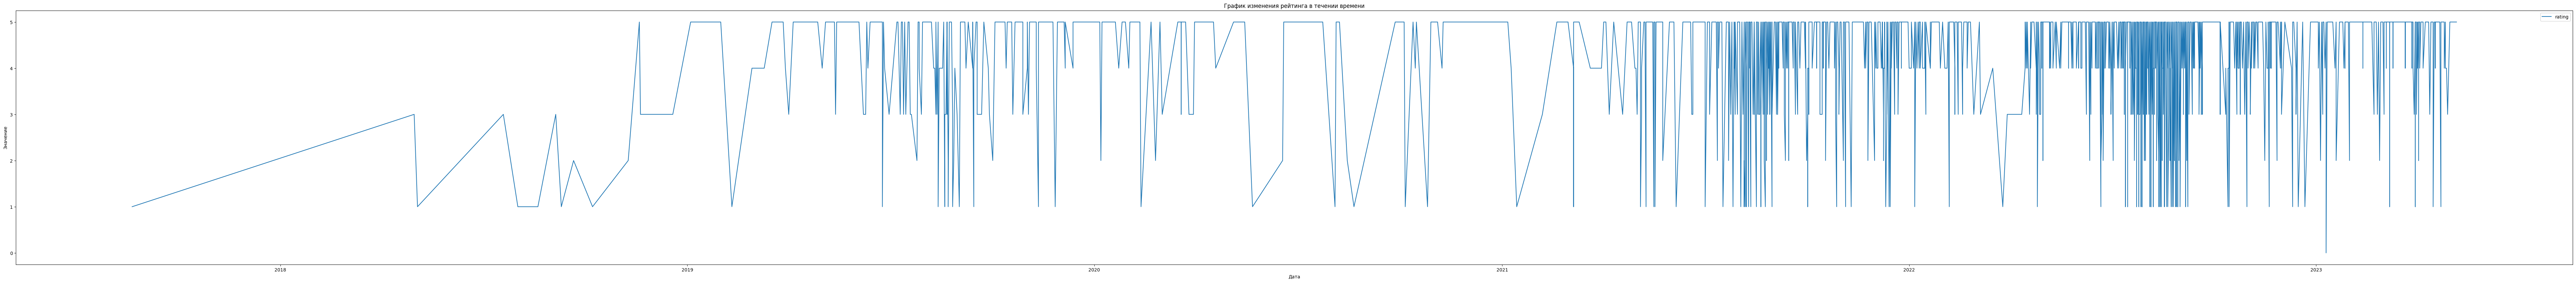

In [ ]:
min_date = data['date'].min()
max_date = data['date'].max()

data.plot(x='date', y='rating', figsize=(100, 10))

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График изменения рейтинга в течении времени')


plt.show()

Изменение рейтинга по каждому году

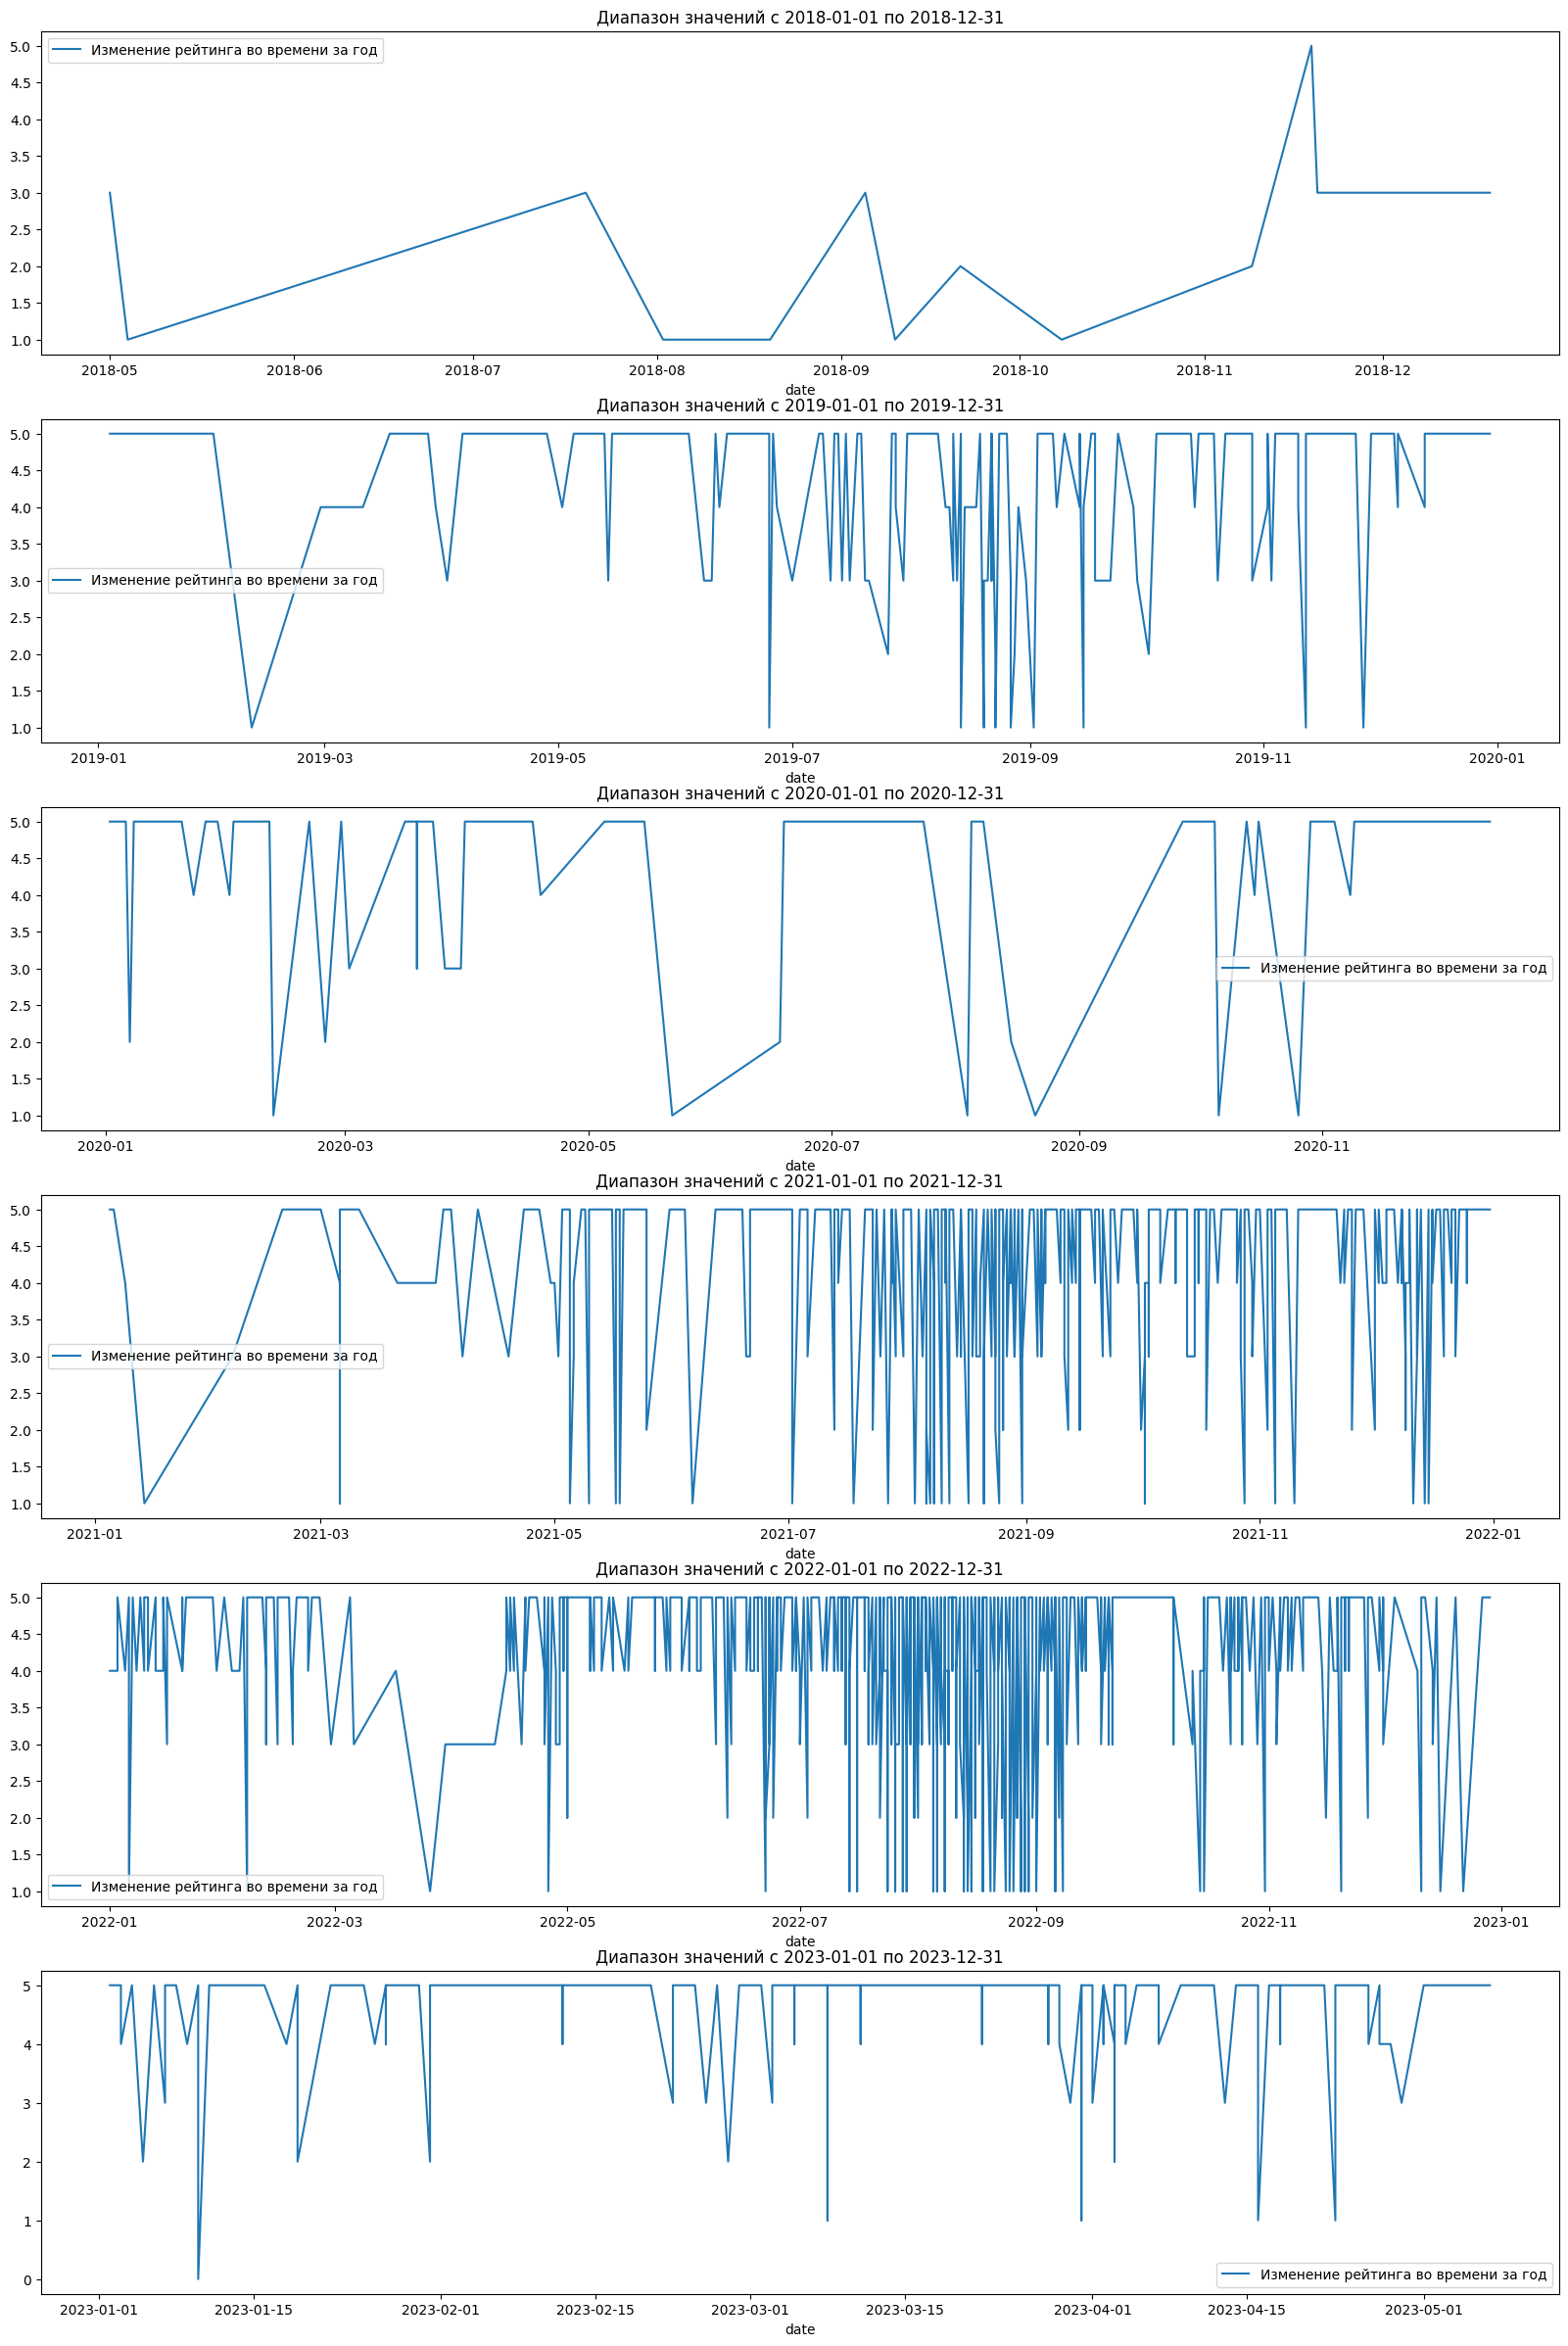

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=1, nrows=6, figsize=(20, 30))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
mean_rating_years = []

start_date = pd.Timestamp(2018, 1, 1)
end_date = pd.Timestamp(2018, 12, 31)

for ax in axs:
  df_selected = data[(start_date.date() <= data['date']) & (data['date'] <= end_date.date())]
  df_selected.plot(x='date', y='rating', ax=ax, label=f'Изменение рейтинга во времени за год')
  df_selected = df_selected.sort_values('date')

  start_date_str = start_date.strftime('%Y-%m-%d')
  end_date_str = end_date.strftime('%Y-%m-%d')

  ax.set_title(f'Диапазон значений с {start_date_str} по {end_date_str}')

  mean_rating_year = df_selected['rating'].mean()
  mean_rating_years.append((mean_rating_year, start_date, end_date))

  start_date = start_date + pd.DateOffset(years=1)
  end_date = end_date + pd.DateOffset(years=1)


In [ ]:
print('Средний рейтинг компании Приморский океанариум по каждому году: ')

for year in mean_rating_years:
  print(f'С {year[1]} по {year[2]} средний рейтинг: {year[0]}')

Средний рейнинг компании Приморский океанариум по каждому году: 
С 2018-01-01 00:00:00 по 2018-12-31 00:00:00 средний рейтинг: 2.125
С 2019-01-01 00:00:00 по 2019-12-31 00:00:00 средний рейтинг: 4.2824858757062145
С 2020-01-01 00:00:00 по 2020-12-31 00:00:00 средний рейтинг: 4.260273972602739
С 2021-01-01 00:00:00 по 2021-12-31 00:00:00 средний рейтинг: 4.2811791383219955
С 2022-01-01 00:00:00 по 2022-12-31 00:00:00 средний рейтинг: 4.343594836146972
С 2023-01-01 00:00:00 по 2023-12-31 00:00:00 средний рейтинг: 4.681451612903226


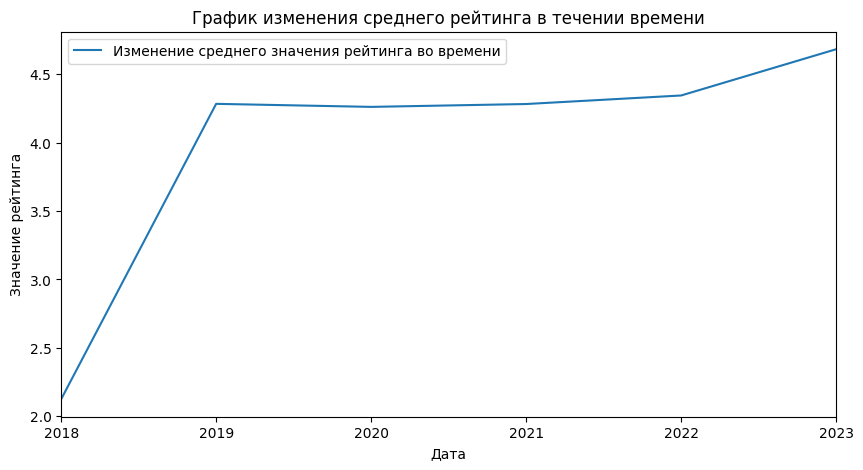

In [ ]:
df_mry = pd.DataFrame(mean_rating_years)
df_mry.columns = ['year_begin', 'year_end', 'mean_rating']

df_mry.plot(x='mean_rating', y='year_begin', figsize=(10, 5), label='Изменение среднего значения рейтинга во времени')

plt.xlabel('Дата')
plt.ylabel('Значение рейтинга')
plt.title('График изменения среднего рейтинга в течении времени')

plt.show()

### Предобработка текста

Стоп-слова

In [ ]:
pretext = ['в', 'на', 'о', 'с', 'у', 'к', 'по', 'за', 'из', 'от', 'до', 'перед', 'через', 'среди', 'между', 'вокруг', 'около', 'возле', 'над', 'под', 'внизу', 'вверху', 'вглубь', 'вдоль', 'насчет', 'со', 'путем']
unions = ['а', 'и', 'но', 'или', 'да', 'как', 'так', 'чем', 'ли', 'же', 'только', 'хоть', 'раз', 'даже', 'после', 'пока', 'тогда', 'хотя', 'если', 'поскольку', 'потому', 'ибо', 'оттого', 'затем', 'ведь', 'чтобы', 'чтоб', 'словно', 'будто', 'точно', 'когда', 'как только', 'также', 'таким образом', 'следовательно', 'в результате', 'итак', 'дабы']

stop_words = unions + pretext

###Обработка текста
1. Токенизация
2. Фильтрация стоп-слов
3. Лемматизация
4. Извлечение биграмм
5. Извлечение триграмм
6. Генерация мешка слов

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
morph = pymorphy2.MorphAnalyzer()

def create_bag_of_words(text):
  bigrams_doc = []
  trigrams_doc = []
  filtered_doc = []

  doc = word_tokenize(text, language='russian')
  tokens = [word.lower() for word in doc if word not in string.punctuation]
  filtered_words = [word for word in tokens if word.lower() not in stop_words]
  lemma_words = []
  for word in filtered_words:
    parses = morph.parse(word)
    lemma = parses[0].normal_form
    lemma_words.append(lemma)
  filtered_doc.append(filtered_words) 
  bigrams = ngrams(lemma_words, 2)
  trigrams = ngrams(lemma_words, 3)

  bag_of_words = {}
  for token in lemma_words:
      bag_of_words[token] = bag_of_words.get(token, 0) + 1
  for bigram in bigrams:
      token = ' '.join(bigram)
      bag_of_words[token] = bag_of_words.get(token, 0) + 1
  for trigram in trigrams:
      token = ' '.join(trigram)
      bag_of_words[token] = bag_of_words.get(token, 0) + 1
    
  return bag_of_words


###Векторизация текстов отзывов

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

texts = data['text']
labels = data['rating']

In [ ]:
vectorizer = TfidfVectorizer(analyzer=create_bag_of_words)

X = vectorizer.fit_transform(texts)
y = labels.to_numpy()

In [ ]:
vectorizer = CountVectorizer(analyzer=create_bag_of_words)

X = vectorizer.fit_transform(texts)
y = labels.to_numpy()

<1962x99589 sparse matrix of type '<class 'numpy.int64'>'
	with 170200 stored elements in Compressed Sparse Row format>

### Обучение модели SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)
y_true = label_binarize(y_test, classes=[1, 2, 3, 4, 5])

svc_params_result = {
    'C': 0.1, 
    'degree': 2, 
    'gamma': 'scale', 
    'kernel': 'linear',
    'class_weight': None,
    }

svm = SVC(**svc_params_result,probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_score = svm.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print('Accuracy: {:.2f}'.format(accuracy))

Precision: 0.69
Accuracy: 0.73


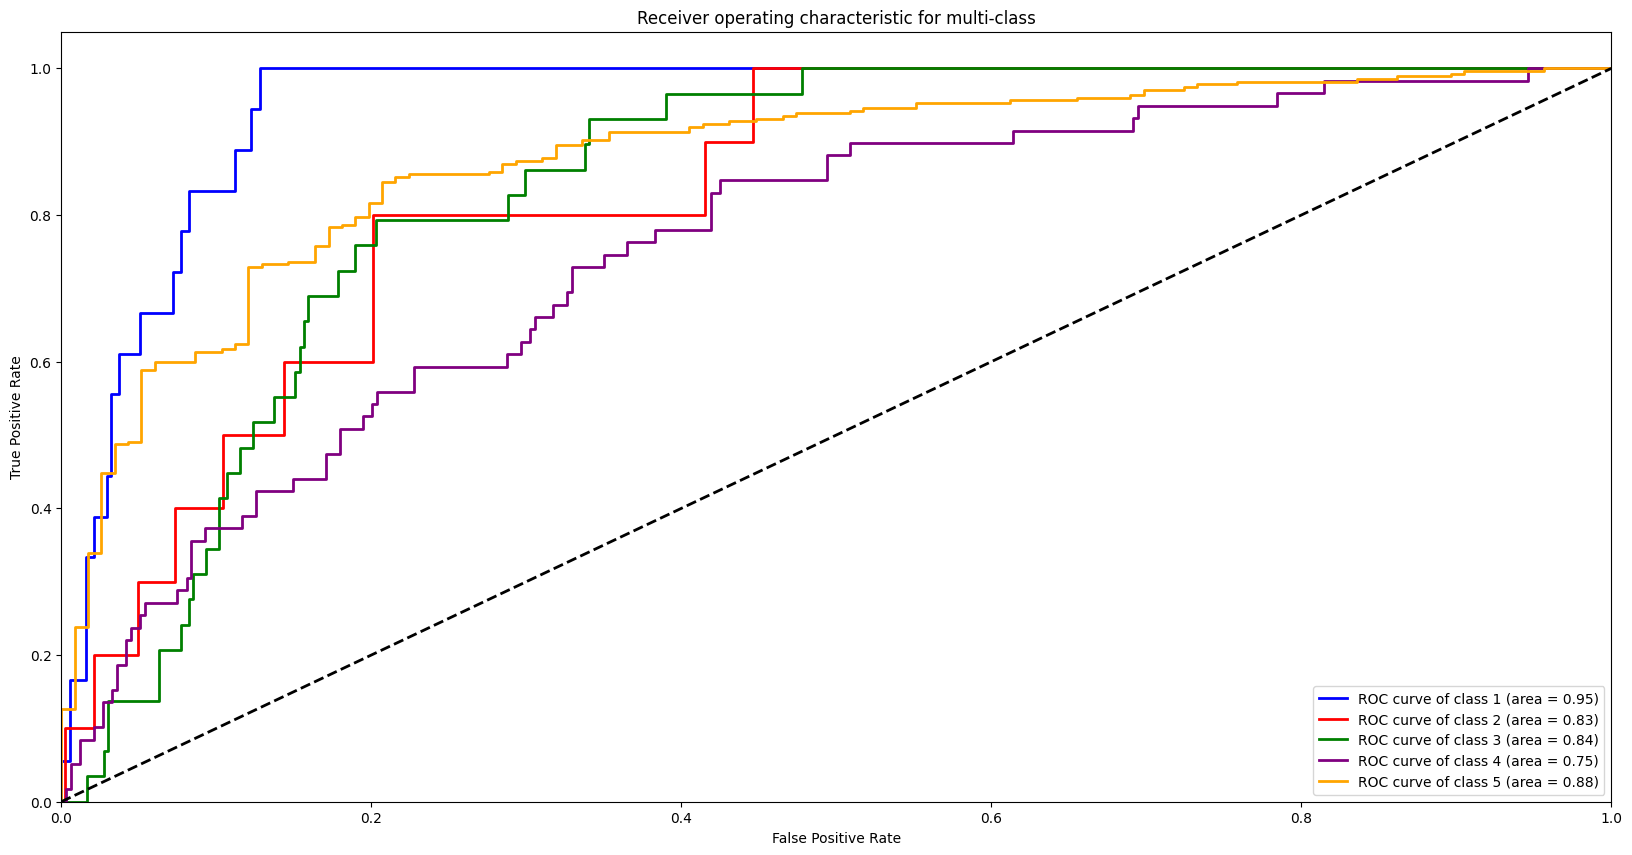

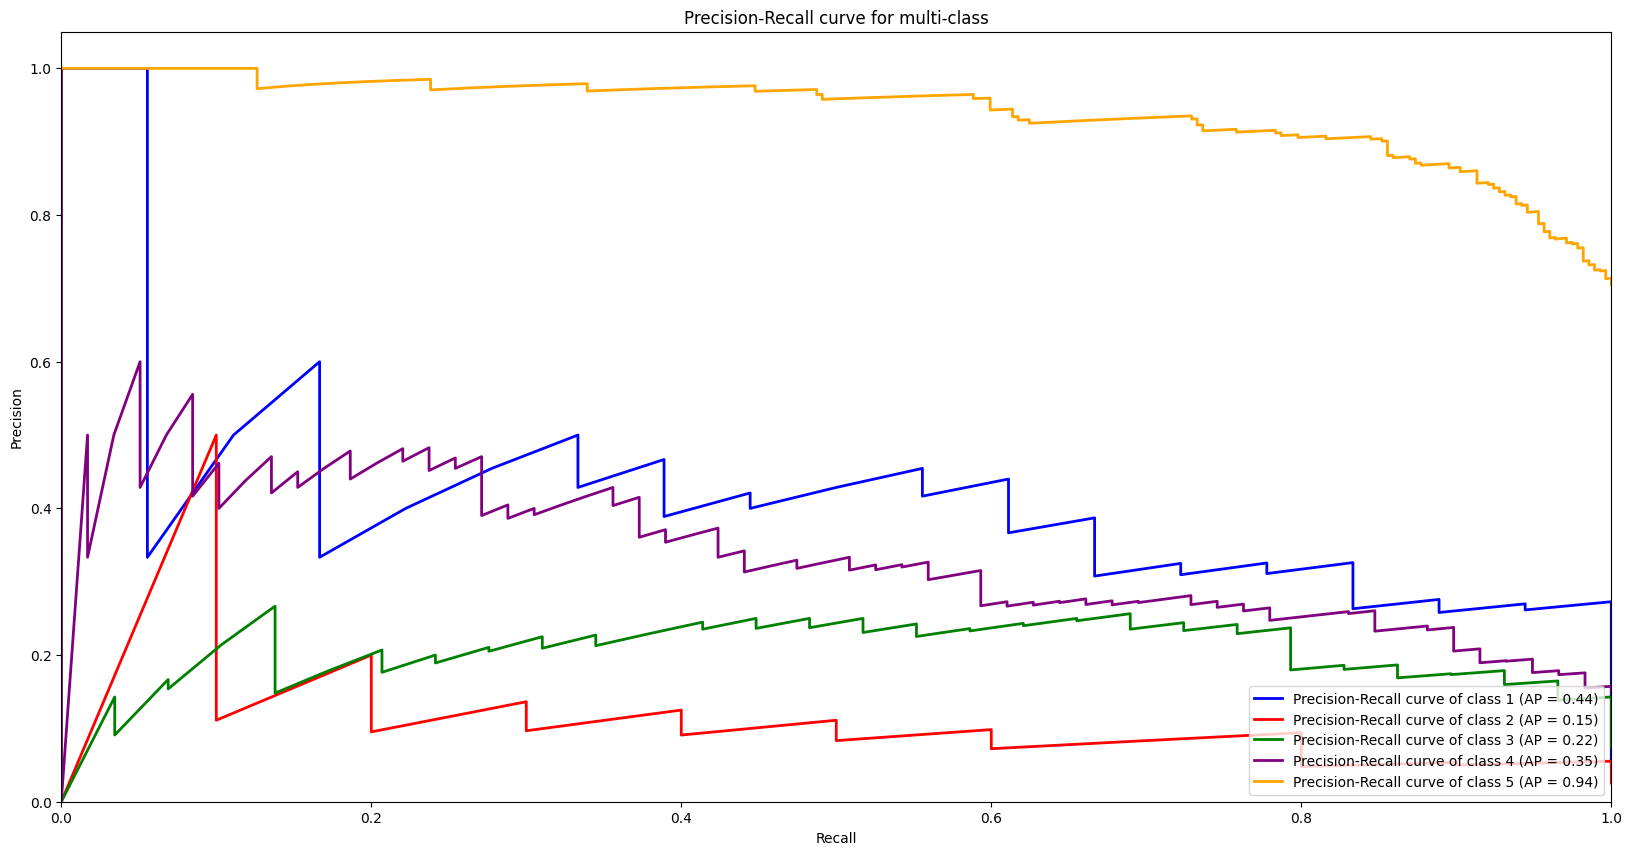

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(20, 10))
lw = 2
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

precision = dict()
recall = dict()
average_precision = dict()
for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_score[:, i])

# Строим Precision-Recall кривую для каждого класса
plt.figure(figsize=(20, 10))
lw = 2
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(5), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-Recall curve of class {0} (AP = {1:0.2f})'
             ''.format(i+1, average_precision[i]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for multi-class')
plt.legend(loc="lower right")
plt.show()

**random state - кросс-валидация по параметру**

In [ ]:
accuracy_max_i = 0
accuracy_max_value = 0

for i in range(1,100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

  svc_params_result = {
      'C': 0.1, 
      'degree': 2, 
      'gamma': 'scale', 
      'kernel': 'linear',
      'class_weight': None,
      }

  svm = SVC(**svc_params_result)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  if accuracy_max_value < accuracy:
    accuracy_max_value = accuracy
    accuracy_max_i = i
    
print('Random state: ', accuracy_max_i ,' Accuracy: ', accuracy_max_value)

Random state:  62  Accuracy:  0.7048346055979644


Выбираем на сколько частей делить выборку в методах кросс-валидации
- **accuracy** - это метрика, которая показывает долю правильных ответов модели. Она вычисляется как отношение числа правильных ответов к общему числу ответов.
- **precision_macro** - это метрика, которая показывает точность модели для каждого класса, усредненную по всем классам с использованием взвешенного среднего. Она вычисляется как среднее арифметическое точности для каждого класса, умноженное на долю этого класса в общем числе примеров.
- **recall_macro** - это метрика, которая показывает полноту модели для каждого класса, усредненную по всем классам с использованием взвешенного среднего. Она вычисляется как среднее арифметическое полноты для каждого класса, умноженное на долю этого класса в общем числе примеров.

In [ ]:
from sklearn.model_selection import cross_validate, KFold
import numpy as np

random_state_values = range(1,21)
kf = KFold(n_splits=20, shuffle=True)
scoring = ['accuracy', 'precision_macro', 'recall_macro']
scores = cross_validate(svm, X, y, cv=kf, scoring=scoring)
df_scores = pd.DataFrame(scores)
index_dict = range(1,21)
df_scores['KFold'] = index_dict
best_accuracy_index = np.argmax(scores['test_accuracy'])
best_random_state = random_state_values[best_accuracy_index]

df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,KFold
0,2.422909,0.069925,0.646465,0.222114,0.232284,1
1,2.396451,0.074706,0.696970,0.311822,0.330000,2
2,2.380025,0.073175,0.693878,0.384615,0.352949,3
3,2.425040,0.082001,0.602041,0.244444,0.264194,4
4,2.958424,0.089981,0.602041,0.273571,0.258983,5
5,2.612516,0.072931,0.602041,0.318157,0.270094,6
6,2.373385,0.068281,0.734694,0.417369,0.389673,7
7,2.322954,0.082312,0.663265,0.283866,0.280362,8
8,2.380369,0.074773,0.795918,0.320370,0.286404,9
9,2.701444,0.090954,0.653061,0.378333,0.302269,10


In [ ]:
best_value = df_scores.iloc[best_accuracy_index, 2]
print(f'Луший результат с разбиением на {best_random_state} частей с точностью {best_value} на тестовой выборке')

Луший результат с разбиением на 9 частей с точностью 0.7959183673469388 на тестовой выборке


**class_weight - кросс-валидация по параметру**
это параметр, который используется в алгоритмах машинного обучения для учета несбалансированности классов в обучающем наборе данных. Он позволяет установить веса для каждого класса, чтобы модель была более чувствительна к меньшему классу и меньше ошибалась на нем

In [ ]:
param_grid_class_weight = {'class_weight': [
    None, 
    'balanced', 
    {1: count_pre[0], 2: count_pre[1], 3: count_pre[2], 4: count_pre[3], 5: count_pre[4]},
]},
  

kf = KFold(n_splits=best_random_state, shuffle=True)

grid_search_class_weight = GridSearchCV(SVC(**svc_params_result), param_grid=param_grid_class_weight, cv=kf)

grid_search_class_weight.fit(X, y)

print("Best parameters: ", grid_search_class_weight.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_class_weight.best_score_))

Best parameters:  {'class_weight': 'balanced'}
Best cross-validation score: 0.68


**gamma - кросс-валидация по параметру**

параметр, определяющий ширину радиальной базисной функции (RBF) ядра. Малые значения gamma соответствуют широким RBF ядрам, что может привести к недообучению, а большие значения gamma соответствуют узким RBF ядрам, что может привести к переобучению. Параметр gamma должен быть настроен с помощью кросс-валидации.

In [ ]:
kf = KFold(n_splits=best_random_state, shuffle=True)
param_grid_gamma = {
    'gamma': np.arange(0.01, 1, 0.01)
}

grid_search_gamma = GridSearchCV(SVC(**svc_params_result), param_grid=param_grid_gamma, cv=kf)

grid_search_gamma.fit(X, y)

print("Best parameters: ", grid_search_gamma.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_gamma.best_score_))

Best parameters:  {'gamma': 0.01}
Best cross-validation score: 0.63


**max-iter - кросс-валидация по параметру**


In [ ]:
param_grid_max_iter = {'max_iter': np.arange(1, 200, 1)}
kf = KFold(n_splits=best_random_state, shuffle=True)

grid_search_max_iter = GridSearchCV(SVC(**svc_params_result), param_grid=param_grid_max_iter, cv=kf)

grid_search_max_iter.fit(X, y)

print("Best parameters: ", grid_search_max_iter.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_max_iter.best_score_))

Best parameters:  {'max_iter': 4}
Best cross-validation score: 0.66


In [ ]:
param_grid_c = {'C': np.arange(0.1, 1, 0.1)}
kf = KFold(n_splits=best_random_state, shuffle=True)

grid_search_c = GridSearchCV(SVC(), param_grid=param_grid_c, cv=kf)

grid_search_c.fit(X, y)

print("Best parameters: ", grid_search_c.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_c.best_score_))

Best parameters:  {'C': 0.1}
Best cross-validation score: 0.66


**kernel(ядро) - кросс-валидация по параметру**

In [ ]:
param_grid_kernel = [
    {'kernel': ['linear'], 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 1, 5, 10], 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['sigmoid'], 'gamma': [0.0001, 0.001, 0.01, 1, 5, 10], 'C': np.arange(0.1, 1, 0.1)}
]
param_grid_kernel_2 = [{
    'C':  np.arange(0.1, 2, 0.5), 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 1, 5, 10],
    'degree': [2, 3, 4],
}]
kf = KFold(n_splits=best_random_state, shuffle=True)
grid_search_kernel = GridSearchCV(SVC(), param_grid=param_grid_kernel_2, cv=kf)

grid_search_kernel.fit(X, y)

print("Best parameters: ", grid_search_kernel.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_kernel.best_score_))

Best parameters:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.67


In [ ]:
param_grid_random_state = {'random_state': np.arange(1, 100, 1)}
kf = KFold(n_splits=best_random_state, shuffle=True)

grid_search_random_state = GridSearchCV(SVC(**svc_params_result), param_grid=param_grid_random_state, cv=kf)

grid_search_random_state.fit(X, y)

print("Best parameters: ", grid_search_random_state.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_random_state.best_score_))

Best parameters:  {'random_state': 1}
Best cross-validation score: 0.68
